11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6826 - loss: 0.9793 - val_accuracy: 0.9125 - val_loss: 0.3081
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9133 - loss: 0.2843 - val_accuracy: 0.9318 - val_loss: 0.2343
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9364 - loss: 0.2201 - val_accuracy: 0.9464 - val_loss: 0.1903
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9495 - loss: 0.1730 - val_accuracy: 0.9452 - val_loss: 0.1799
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9534 - loss: 0.1581 - val_accuracy: 0.9528 - val_loss: 0.1629
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9577 - loss: 0.1436 - val_accuracy: 0.9557 - val_loss: 0.1606
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9612 - loss: 0.1297 - val_accuracy: 0.9574 - val_loss: 0.1549
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/st

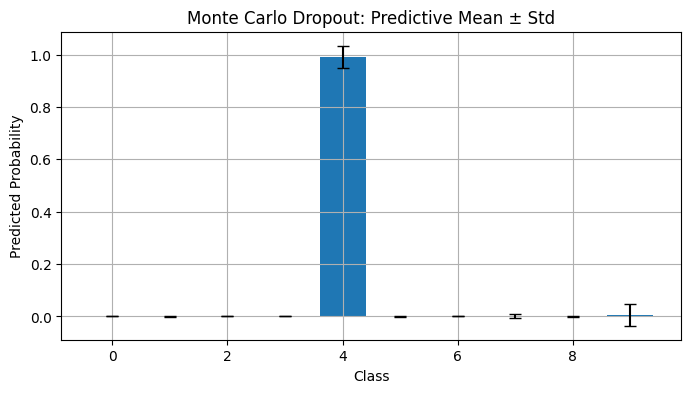

In [ ]:
# 03_montecarlo_dropout.ipynb

# 📌 Objective: Demonstrate Monte Carlo Dropout for uncertainty estimation (Bayesian Deep Learning)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# ✅ Enable dropout at inference
class MCDropout(layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

# ✅ Load dataset (MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# ✅ Build model with MC Dropout layers
def build_mc_dropout_model():
    inputs = keras.Input(shape=(784,))
    x = layers.Dense(256, activation='relu')(inputs)
    x = MCDropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = MCDropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_mc_dropout_model()
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# ✅ Monte Carlo predictions (T forward passes)
def monte_carlo_predictions(model, x, T=50):
    preds = np.stack([model(x, training=True).numpy() for _ in range(T)])
    mean_preds = preds.mean(axis=0)
    std_preds = preds.std(axis=0)
    return mean_preds, std_preds

# ✅ Run MC Dropout on a sample
sample_idx = 42
x_sample = np.expand_dims(x_test[sample_idx], axis=0)

mean_pred, std_pred = monte_carlo_predictions(model, x_sample, T=100)

print("Predicted class:", np.argmax(mean_pred))
print("Prediction uncertainty (std):", std_pred[0][np.argmax(mean_pred)])

# ✅ Plot uncertainty distribution
plt.figure(figsize=(8, 4))
plt.bar(range(10), mean_pred[0], yerr=std_pred[0], capsize=4)
plt.xlabel("Class")
plt.ylabel("Predicted Probability")
plt.title("Monte Carlo Dropout: Predictive Mean ± Std")
plt.grid(True)
plt.show()